In [1]:
rm(list=ls())
options(jupyter.plot_scale=1)
library('cobalt')
library('stringr')
library("MatchIt")
library('grid')
library('gridExtra')
library('ggplot2')


setwd("C:/Users/peppu/Documents/MyPythonProject/BayesianInference/Assignment_Mealli")

Warning message:
"package 'cobalt' was built under R version 4.0.5"
 cobalt (Version 4.3.1, Build Date: 2021-03-30 09:50:18 UTC)

Warning message:
"package 'stringr' was built under R version 4.0.5"
Warning message:
"package 'MatchIt' was built under R version 4.0.5"

Attaching package: 'MatchIt'


The following object is masked from 'package:cobalt':

    lalonde




# 1 - Project

#### 1 - Load the dataset in R. Temporarily remove the outcome, OUTCOME, from the data set.

In [2]:
data = read.table("TrainingLux.txt",header=TRUE)
y = data$Outcome
Z = data$TREAT
X_treat = within(data, rm('Outcome'))
X = within(X_treat, rm('TREAT'))
head(X)

# Correct specification for categorical variables. Not needed here because they are binaries
# XXX = transform(X_TREAT, 
# gender = as.factor(gender),
# married = as.factor(married),
# natio1 = as.factor(natio1),
# natio2 = as.factor(natio2),
# natio3 = as.factor(natio3),
# natio4 = as.factor(natio4),
# natio5 = as.factor(natio5),
# educ1 = as.factor(educ1),
# educ2 = as.factor(educ2),
# educ3 = as.factor(educ3),
# EmployLevel1 = as.factor(EmployLevel1), 
# EmployLevel2 = as.factor(EmployLevel2), 
# EmployLevel3 = as.factor(EmployLevel3), 
# EmployLevel4 = as.factor(EmployLevel4), 
# EmployLevel5 = as.factor(EmployLevel5), 
# skill = as.factor(skill),
# sector0 = as.factor(sector0),
# sector1 = as.factor(sector1),
# sector2 = as.factor(sector2),
# sector3 = as.factor(sector3),
# sector4 = as.factor(sector4),
# work_12 = as.factor(work_12))

,age,gender,married,natio1,natio2,natio3,natio4,natio5,educ1,educ2,...,EmployLevel4,EmployLevel5,skill,sector0,sector1,sector2,sector3,sector4,work_12,nb_mthbf_12
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,60,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,12
4,60,0,1,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,12
8,63,1,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,12
11,60,0,1,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,12
13,59,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
16,60,1,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


#### 2 - For each covariate, display the mean within each treatment group and the standardized difference in a table.

In [3]:
meanT = apply(X[Z==1,],2,mean) # Average of the treated
meanC = apply(X[Z==0,],2,mean) # Average of the controls
varT = apply(X[Z==1,],2,var) # Variance of the treated
varC = apply(X[Z==0,],2,var) # Variance of the controls

meandiff = meanT - meanC
StMeanDiff = meandiff/ sqrt((varT+varC)/2) # STANDARDIZED DIFFERENCE BETWEEN MEANS
StMeanDiffTtest = meandiff/sqrt(varT/sum(Z==1) + varC/sum(Z==0)) # STANDARDIZED DIFFERENCE BETWEEN MEANS (t-test)
range_var = apply(X,2,max)-apply(X,2,min) # Range of the variable

round(cbind(meanT, meanC, meandiff, StMeanDiff,StMeanDiffTtest,range_var),3)

,meanT,meanC,meandiff,StMeanDiff,StMeanDiffTtest,range_var
age,36.826,34.435,2.391,0.231,8.469,54
gender,0.649,0.471,0.178,0.364,12.037,1
married,0.556,0.420,0.136,0.274,8.852,1
natio1,0.055,0.308,-0.253,-0.693,-34.134,1
natio2,0.270,0.301,-0.031,-0.068,-2.247,1
natio3,0.274,0.194,0.080,0.189,5.800,1
natio4,0.187,0.081,0.106,0.316,8.906,1
natio5,0.214,0.116,0.097,0.265,7.747,1
educ1,0.277,0.272,0.005,0.011,0.363,1
educ2,0.340,0.495,-0.155,-0.318,-10.565,1


#### 3 - Estimate a propensity score for each unit in the observational study using the fitted values from a logistic regression with main effects for all of the covariates contained in the data set (leave out transformations and interactions here, but we would generally want to explore these other terms). Compare graphically the distributions of estimated propensity scores within the treatment groups and explain what you see.

In [4]:
model_ps = glm(TREAT~., data=X_treat, family=binomial(link=logit)) # Propensity score estimation
log_ps = predict.glm(model_ps) # equalt to log(pscores/(1-pscores)) 
pscore = model_ps$fitted # Propensity score
# summary(model_ps)

Mlp.c<-mean(log_ps[Z==0]) # Mean log ps of the controls
Mlp.t<-mean(log_ps[Z==1]) # Mean log ps of the treated
Vlp.c<-var(log_ps[Z==0]) # Var log ps of the controls
Vlp.t<-var(log_ps[Z==1]) # Var log ps of the tread 
 
StandDiff_log_ps = (Mlp.t-Mlp.c)/sqrt((Vlp.t+Vlp.c)/2)
StandDiff_log_ps # Standard difference in LOG_PS

[1] 1.47183

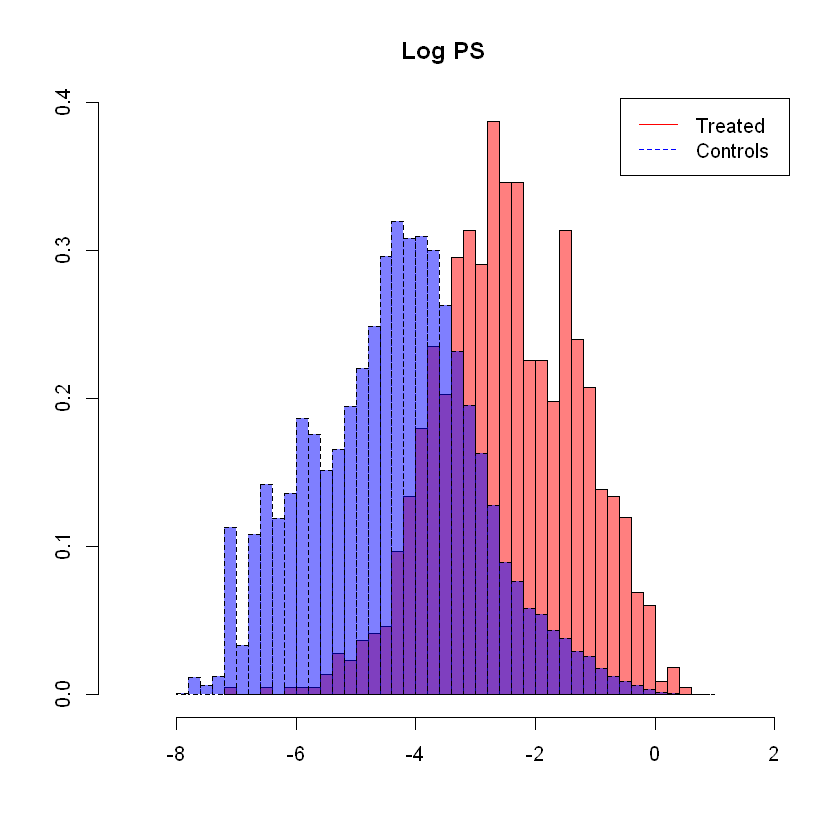

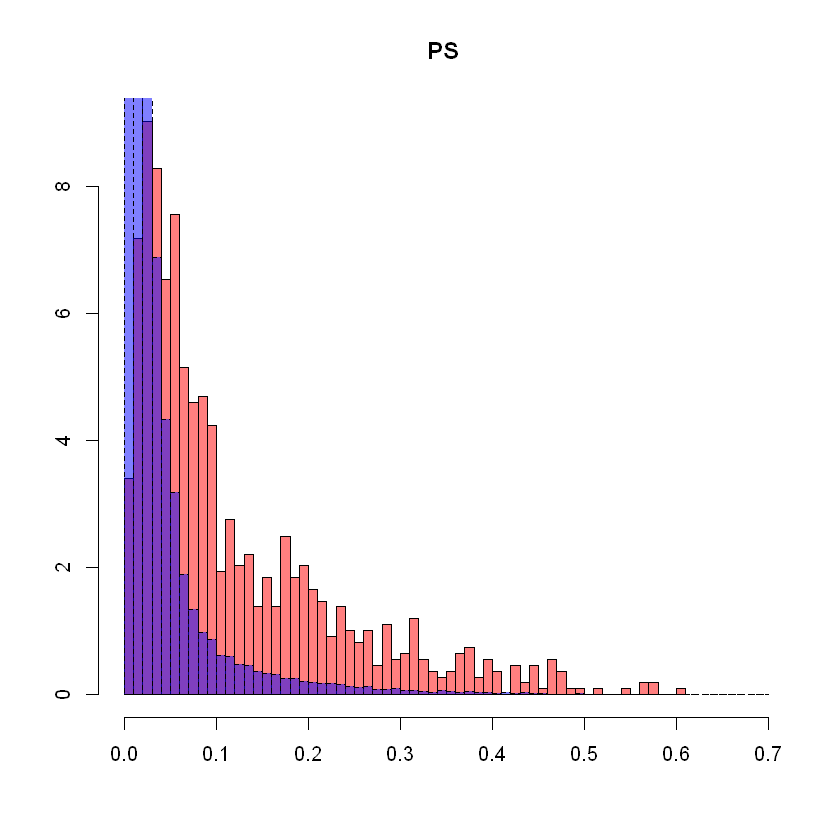

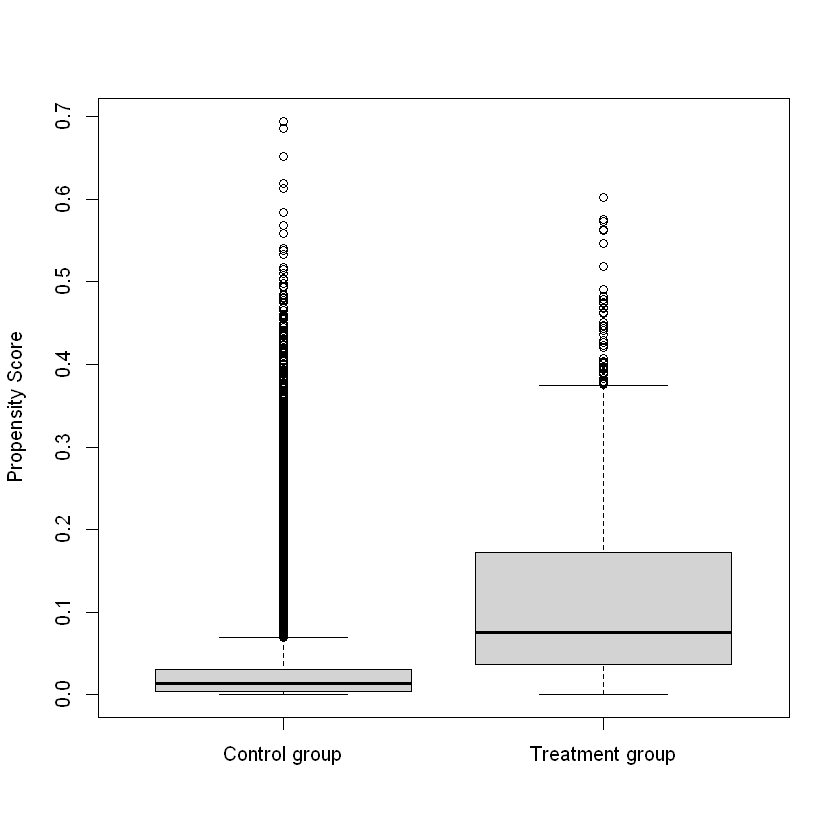

In [5]:
x_low_lim = min(log_ps) - 1 # Set the minimum for the breakpoints
x_up_lim = max(log_ps) + 1 # Set the maximum for the breakpoints

par(mfcol=c(1,1))
hist(log_ps[Z==1], freq=FALSE, main="Log PS",xlab="",ylab="",breaks=50,
     xlim=c(x_low_lim,x_up_lim), col=rgb(1,0,0,0.5))
hist(log_ps[Z==0], freq=FALSE, breaks=50,
     xlim=c(x_low_lim,x_up_lim), add=TRUE, lwd=2, 
      col=rgb(0,0,1,0.5), lty=2,)
par(xpd=TRUE)
legend("topright",
       legend = c("Treated", "Controls"),
       lty = c(1, 2),
       col = c("red", "blue"),
       cex = 1)
par(xpd=FALSE)

x_low_lim = min(pscore) - 0.001 # Set the minimum for the breakpoints
x_up_lim = max(pscore) + 0.001 # Set the maximum for the breakpoints

hist(pscore[Z==1], freq=FALSE, main="PS",xlab="",ylab="",breaks=50,
     xlim=c(x_low_lim,x_up_lim), col=rgb(1,0,0,0.5))
hist(pscore[Z==0], freq=FALSE, breaks=50,
     xlim=c(x_low_lim,x_up_lim), add=TRUE, lwd=2, col=rgb(0,0,1,0.5), lty=2,)

boxplot(pscore~Z, ylab="Propensity Score",
        names=c("Control group",
                "Treatment group"), xlab="")

The mean of the propensity score is different between the two groups and this is an indication of plausible fit of the propensity score. It is necessary to note that even for treated group the propensity score is not close to 1 (value I expected); this could be probably due to very high number of controls vs treated. This behavior of the fitted PS should not be a problem since PS is used to create groups and not for predictiont task. <br>
In the 1st and 3rd subplot it is clear that there is an high overlap of PS between treated and untreated.

#### 4. What are the implications of the fact that the propensity score is a balancing score?
The propensity score balances the distribution of all X between the treatment groups; this means that the following holds true:

<img src="figures/bal_score.png">

# TRIMMING AND SUBCLASSIFICATION ON PROPENSITY SCORE
Now assess balance and create balanced groups.

#### 5 - In order to do so, first discard control units with estimated propensity scores lower than the minimum of the active treated units' estimated propensity scores or higher than the maximum of the active treatment units' estimated propensity scores.
#### How many units did you discard? Why is is important to discarding these units?

In [6]:
trim_bool = (log_ps>=min(log_ps[Z==1])) & (log_ps<=max(log_ps[Z==1]))
X_treat_trim = X_treat[trim_bool,] # Trimmed data
X_trim = X[trim_bool,] # Trimmed covariates
y_trim = y[trim_bool]
Z_trim = X_treat_trim$TREAT # Trimmed treatment
print('Number of filtered points')
dim(X_treat)[1]- dim(X_treat_trim)[1]

[1] "Number of filtered points"


[1] 370

It is important to discard these values because these values "do not overlap"; basically there are no treated units with that propensity score, meaning that the covariates are very different and no comparison is allowed.

In [7]:
meanT_trim = apply(X_trim[Z_trim==1,],2,mean) # Average of the treated
meanC_trim = apply(X_trim[Z_trim==0,],2,mean) # Average of the controls
varT_trim = apply(X_trim[Z_trim==1,],2,var) # Variance of the treated
varC_trim = apply(X_trim[Z_trim==0,],2,var) # Variance of the controls

meandiff_trim = meanT_trim - meanC_trim # Difference in mean
StMeanDiff_trim = meandiff_trim/ sqrt((varT_trim+varC_trim)/2) # STANDARDIZED DIFFERENCE BETWEEN MEANS
StMeanDiffTtest_trim = meandiff_trim/sqrt(varT_trim/sum(Z_trim==1) + varC_trim/sum(Z_trim==0)) # STANDARDIZED DIFFERENCE BETWEEN MEANS (t-test)
range_var_trim = apply(X_trim,2,max)-apply(X_trim,2,min)
max_var_trim = apply(X_trim,2,max)
min_var_trim = apply(X_trim,2,min)


round(cbind(meanT_trim, meanC_trim, meandiff_trim, StMeanDiff_trim,StMeanDiffTtest_trim,max_var_trim,min_var_trim),3)

,meanT_trim,meanC_trim,meandiff_trim,StMeanDiff_trim,StMeanDiffTtest_trim,max_var_trim,min_var_trim
age,36.826,34.597,2.229,0.216,7.894,69,15
gender,0.649,0.476,0.173,0.353,11.687,1,0
married,0.556,0.425,0.131,0.265,8.552,1,0
natio1,0.055,0.300,-0.245,-0.676,-33.088,1,0
natio2,0.270,0.304,-0.034,-0.076,-2.498,1,0
natio3,0.274,0.196,0.077,0.183,5.636,1,0
natio4,0.187,0.082,0.106,0.313,8.834,1,0
natio5,0.214,0.118,0.096,0.261,7.644,1,0
educ1,0.277,0.275,0.002,0.005,0.168,1,0
educ2,0.340,0.490,-0.150,-0.307,-10.207,1,0


#### 6 - Using the units remaining after 5, create five subclasses based on the estimated propensity score. You are allowed to choose size and bounds of the subclasses. You are supposed to create the best subclasses based on your own reasoning. Create a table showing the number of treated and control units within each of the five subclasses. Briefly comment and explain your choice.

In [8]:
model_ps_trim = glm(TREAT~., data=X_treat_trim, family=binomial(link=logit)) # Estimate a new propensity score
log_ps_trim = predict.glm(model_ps_trim)
pscore_trim = model_ps_trim$fitted

# This function retrieve the groups and statistics given an array of "breaks"
ps_table_results = function(breaks, log_ps_trim, X_trim,  Z_trim, min_in_breaks = FALSE, max_in_breaks = FALSE){
    bins = rep(NA,nrow(X_trim))
    
    if (min_in_breaks==TRUE){
        prev_i = breaks[1]
        breaks = breaks[2:length(breaks)]
    }
    else{
        prev_i = min(log_ps_trim)-0.000001
    }
    
    if (max_in_breaks==TRUE){
        new_breaks = breaks
    }
    else{
        new_breaks = c(breaks,max(log_ps_trim)+0.000001)
    }
    
    j = 1
    for (i in new_breaks){
        sel_bin = (log_ps_trim>prev_i & log_ps_trim<=i)
        bins[sel_bin] = j

        sel_bin_treat = Z_trim==1 & sel_bin
        sel_bin_control = Z_trim==0 & sel_bin

        meanT_trim = apply(X_trim[sel_bin_treat,],2,mean)
        meanC_trim = apply(X_trim[sel_bin_control,],2,mean)
        varT_trim = apply(X_trim[sel_bin_treat,],2,var)
        varC_trim = apply(X_trim[sel_bin_control,],2,var)
        meandiff_trim = meanT_trim - meanC_trim
        if (j==1){
            mean_df = data.frame(mean_t_1=meanT_trim, mean_c_1 = meanC_trim)
            var_df = data.frame(var_t_1=varT_trim, var_c_1 = varC_trim)
            std_diff_df = data.frame(std_diff_1=meandiff_trim/ sqrt((varT_trim+varC_trim)/2))
            std_diff_ttest_df = data.frame(std_diff_t_1=meandiff_trim/sqrt(varT_trim/sum(Z_trim==1) + varC_trim/sum(Z_trim==0)))
        }
        else{
            std_diff_df$temp = meandiff_trim/ sqrt((varT_trim+varC_trim)/2)  # STANDARDIZED DIFFERENCE BETWEEN MEANS
            colnames(std_diff_df)[length(colnames(std_diff_df))] = paste('std_diff', j, sep="_")
            std_diff_ttest_df$temp = meandiff_trim/sqrt(varT_trim/sum(Z_trim==1) + varC_trim/sum(Z_trim==0)) # STANDARDIZED DIFFERENCE BETWEEN MEANS (t-test)
            colnames(std_diff_ttest_df)[length(colnames(std_diff_ttest_df))] = paste('std_diff_t', j, sep="_")
            mean_df$temp = meanT_trim # 
            colnames(mean_df)[length(colnames(mean_df))] = paste('mean_t', j, sep="_")
            mean_df$temp = meanC_trim #
            colnames(mean_df)[length(colnames(mean_df))] = paste('mean_c', j, sep="_")
            var_df$temp = varT_trim # 
            colnames(var_df)[length(colnames(var_df))] = paste('var_t', j, sep="_")
            var_df$temp = varC_trim #
            colnames(var_df)[length(colnames(var_df))] = paste('var_c', j, sep="_")
        }

        j = j+1
        prev_i = i
    }
    
    return(list(mean_df=mean_df, var_df=var_df,std_diff_df=std_diff_df, std_diff_ttest_df=std_diff_ttest_df, bins=bins))
    }

breaks = quantile(log_ps_trim, c(0.72, 0.86, 0.925, 0.97))
ps_res = ps_table_results(breaks, log_ps_trim, X_trim,  Z_trim, min_in_breaks=FALSE, max_in_breaks=FALSE)
std_diff_df = ps_res$std_diff_df
bins = ps_res$bins
table(bins, Z_trim)
table(bins)

    Z_trim
bins     0     1
   1 23790   209
   2  4461   208
   3  1943   221
   4  1292   208
   5   761   239

bins
    1     2     3     4     5 
23999  4669  2164  1500  1000 

I modified the quantile values to obtain 5 groups with the same number of treated units. The goal is to have 5 groups with different propensity score (so different covariates) but equally balanced.

#### 7. Separately for each subclass created in 6, calculate the mean within each treatment group for each covariate. Present the results in a table. Briefly describe what you see.

,mean_t_1,mean_c_1,mean_t_2,mean_c_2,mean_t_3,mean_c_3,mean_t_4,mean_c_4,mean_t_5,mean_c_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,34.35,33.68,35.95,37.73,35.65,36.96,38.09,35.88,39.74,36.61
gender,0.50,0.41,0.63,0.64,0.61,0.69,0.69,0.64,0.79,0.78
married,0.46,0.37,0.50,0.59,0.56,0.58,0.56,0.51,0.69,0.58
natio1,0.22,0.39,0.04,0.06,0.02,0.04,0.00,0.01,0.00,0.00
natio2,0.35,0.33,0.34,0.19,0.30,0.30,0.30,0.38,0.08,0.17
natio3,0.22,0.17,0.28,0.30,0.25,0.23,0.34,0.29,0.28,0.30
natio4,0.08,0.04,0.18,0.21,0.23,0.20,0.17,0.16,0.26,0.28
natio5,0.12,0.08,0.16,0.23,0.19,0.23,0.19,0.16,0.37,0.25
educ1,0.25,0.27,0.25,0.28,0.29,0.24,0.30,0.31,0.29,0.31


,std_diff_1,std_diff_2,std_diff_3,std_diff_4,std_diff_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,0.07,-0.18,-0.13,0.22,0.33
gender,0.19,-0.02,-0.17,0.11,0.04
married,0.18,-0.19,-0.04,0.11,0.23
natio1,-0.39,-0.09,-0.10,-0.06,NaN
natio2,0.06,0.32,0.01,-0.17,-0.27
natio3,0.15,-0.04,0.05,0.10,-0.04
natio4,0.19,-0.08,0.06,0.03,-0.04
natio5,0.15,-0.18,-0.09,0.07,0.27
educ1,-0.06,-0.06,0.13,-0.03,-0.04


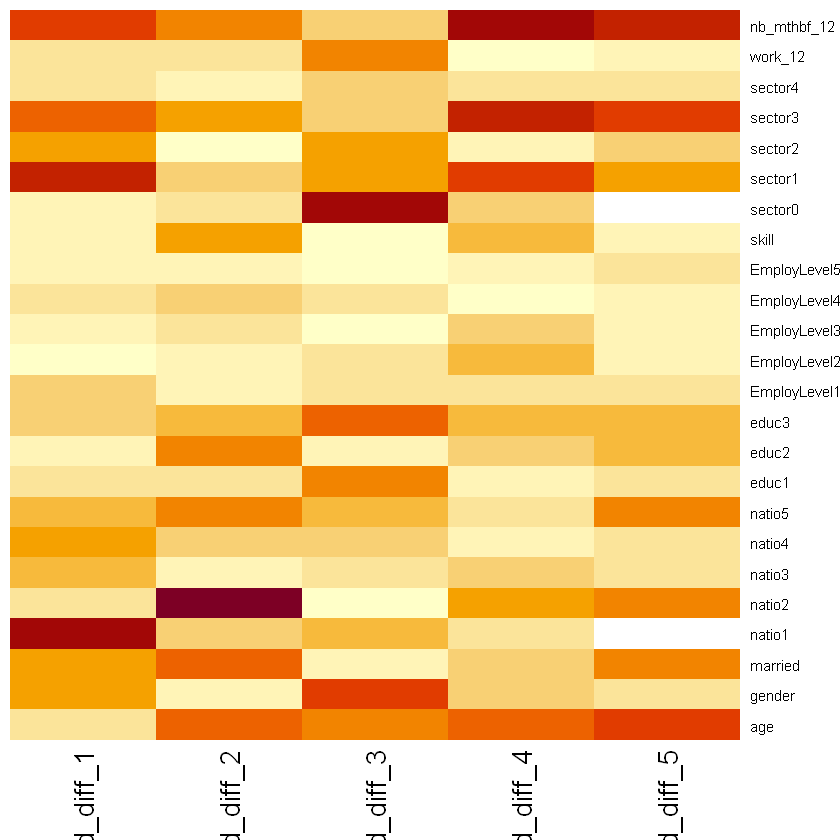

In [9]:
round(ps_res$mean_df,2)
# round(sqrt(ps_res$var_df),2)
round(std_diff_df,2)
par(mfrow=c(1,2))
heatmap(abs(as.matrix(std_diff_df)), Colv = NA, Rowv = NA, scale="column",na.rm=TRUE)

There are two main points i would like to raise:
- <b>Continuous variables "age" and "nb_mthbf_12"</b> seems more unbalanced than the other variables. Even if there are some high unbalance in "natio1"/"bin=1" and "natio2"/"bin=2", "age" and "nb_mthbf_12" are constantly the one with the highest unbalance. Is this because of the nature of the covariate (continuous vs categorical)?
- "natio1" and "sector0" units are all "zeros" in group 5; this means that no people from outside EU and "no sector" worker are in present in this group. Is this acceptable?

#### 7 - b Summarize the average balance achieved for each covariate by averaging the differences in means across subclasses, weighting by the NUMBER OF UNITS IN THE ACTIVE TREATMENT GROUP in each subclass. Why would we weight by the number of active treatment units? Display these covariate means, averaged across the subclasses, in Table 1.

In [10]:
treat_tab = table(bins, Z_trim)
treatweights = treat_tab[,2]/sum(treat_tab[,2]) # weights based on number of treated in each group

indx = grepl('mean_t', colnames(ps_res$mean_df))
bmeanT =t(ps_res$mean_df[indx])
indx = grepl('mean_c', colnames(ps_res$mean_df))
bmeanC =t(ps_res$mean_df[indx])
indx = grepl('var_t', colnames(ps_res$var_df))
bvarT =t(ps_res$mean_df[indx])
indx = grepl('var_c', colnames(ps_res$var_df))
bvarC =t(ps_res$mean_df[indx])

meanT_bt = t(bmeanT)%*%treatweights
meanC_bt = t(bmeanC)%*%treatweights
meandiff_trim_block = t(bmeanT-bmeanC)%*%treatweights # NOTE!!!!! Should we have here an absolute value???? 
round(cbind(meanC_bt, meanT_bt, meandiff_trim_block), 2)
###################################### different from R script of class (the normalization is not calculated)
StMeanDiff_block_t = meandiff_trim_block/sqrt({varT_trim+varC_trim}/2)
###################################### different from R script of class (the normalization is not calculated)
# maybe the following?
# t((bmeanT-bmeanC)/sqrt({bvarT+bvarC}/2))%*%treatweights

age,36.19,36.83,0.63
gender,0.64,0.65,0.01
married,0.53,0.56,0.03
natio1,0.10,0.06,-0.04
natio2,0.27,0.27,0.00
natio3,0.26,0.27,0.02
natio4,0.18,0.19,0.01
natio5,0.19,0.21,0.02
educ1,0.28,0.28,-0.01
educ2,0.35,0.34,-0.01
educ3,0.37,0.38,0.01


The units MUST be weighted on active treatment units because otherwise group 1 that has a thousands of units more than other groups will be the one "driving" all the results. <br> <br>
<u><b>NOTE:</b></u> here I am calculating the avarage of the difference in means NOT in absolute value. If I have two groups with very high differences but different in sign I would have "zero mean difference"; should I use the BAS value?

In [11]:
# Increase balance table
round(cbind(StMeanDiff,StMeanDiff_block_t,(StMeanDiff-StMeanDiff_block_t)/StMeanDiff),3)

,StMeanDiff,,
age,0.231,0.061,0.735
gender,0.364,0.028,0.922
married,0.274,0.058,0.787
natio1,-0.693,-0.117,0.831
natio2,-0.068,-0.003,0.953
natio3,0.189,0.041,0.784
natio4,0.316,0.019,0.941
natio5,0.265,0.055,0.792
educ1,0.011,-0.012,2.032
educ2,-0.318,-0.013,0.960


#### 8 - Use descriptive tools (graphs and statistics) to assess covariate balance.

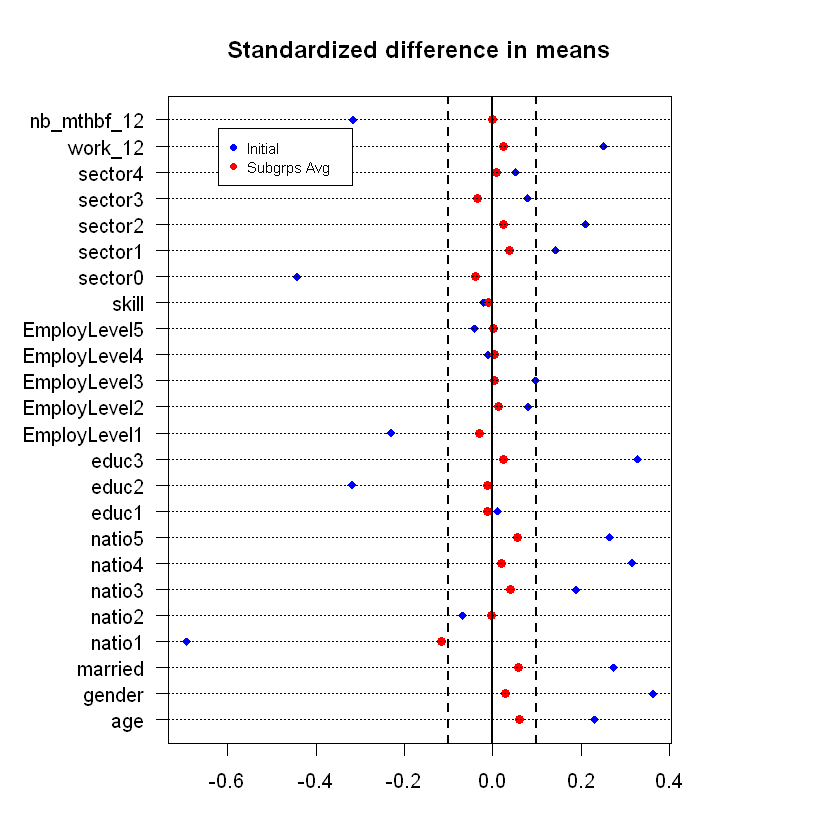

In [12]:
#### LOVE-PLOTS

# ALL
par(mar=c(4, 7, 4, 7), xpd=FALSE)
plot(StMeanDiff, 1:dim(X_trim)[2],  xlab=NA, ylab=NA, yaxt="n",
     xlim=c(min(c(StMeanDiff, StMeanDiff_block_t)),
            max(c(StMeanDiff, StMeanDiff_block_t))),
     pch=18, col="blue",
     main="Standardized difference in means", sub="Binary covariates")
points(StMeanDiff_block_t, 1:dim(X_trim)[2], col="red", pch=19)
axis(2, labels=names(X_trim),at=1:dim(X_trim)[2], las=1)
abline(h=1:dim(X_trim)[2], lty="dotted")
abline(v=0, lwd=2)
abline(v=0.1, lwd=2, lty=2)
abline(v=-0.1, lwd=2, lty=2)
par(xpd=TRUE)
legend("topleft",
       inset = c(0.1,0.05),
       legend = c("Initial", "Subgrps Avg"),
       pch = c(19, 19),
       col = c("blue", "red"),
       cex = 0.75)
par(xpd=FALSE)

#### 9 - What might we have changed about the propensity score model and/or subclassification method used in 6 in order to achieve better covariate balance? Change the propensity score model or subclassification method in at least one way (Hint: you may create more subclasses or change the specification of the propensity score by including interaction or nonlinear terms). Graphically summarize the covariate balance achieved and compare it to the balance achieved by your design to the balance achieved by the subclasses you created in 6. Briefly explain the motivation for your design and whether the resulting balance was as you expected. (If your design did not achieve the balance that you expected, that is okay.)
I decided to have smaller groups and to discard very high and very low propensity scores; I expect to have more balanced groups because they are smaller and without the "extremes"

In [13]:
breaks_new = quantile(log_ps_trim, c(0.75, 0.8, 0.84,0.872,0.898,0.915, 0.938, 0.96))
ps_res_new = ps_table_results(breaks_new, log_ps_trim, X_trim,  Z_trim, min_in_breaks=TRUE, max_in_breaks=TRUE)
bins_new = ps_res_new$bins

X_trim_new = X_trim[!is.na(bins_new),]
Z_trim_new = Z_trim[!is.na(bins_new)]
y_trim_new = y_trim[!is.na(bins_new)]
varT_trim_new = apply(X_trim_new[Z_trim_new==1,],2,var) # Variance of the treated
varC_trim_new = apply(X_trim_new[Z_trim_new==0,],2,var) # Variance of the controls

std_diff_df_new = ps_res_new$std_diff_df
table(bins_new, Z_trim)
table(bins_new)

treat_tab_new = table(bins_new, Z_trim)
treatweights_new = treat_tab_new[,2]/sum(treat_tab_new[,2]) # weights based on number of treated in each group

indx = grepl('mean_t', colnames(ps_res_new$mean_df))
bmeanT_new =t(ps_res_new$mean_df[indx])
indx = grepl('mean_c', colnames(ps_res_new$mean_df))
bmeanC_new =t(ps_res_new$mean_df[indx])
indx = grepl('var_t', colnames(ps_res_new$var_df))
bvarT_new =t(ps_res_new$mean_df[indx])
indx = grepl('var_c', colnames(ps_res_new$var_df))
bvarC_new =t(ps_res_new$mean_df[indx])

meanT_bt_new = t(bmeanT_new)%*%treatweights_new
meanC_bt_new = t(bmeanC_new)%*%treatweights_new
meandiff_trim_block_new = t(bmeanT_new-bmeanC_new)%*%treatweights_new

# round(ps_res_new$mean_df,2)
# # round(sqrt(ps_res$var_df),2)
# round(std_diff_df,2)
# round(cbind(meanC_bt_new, meanT_bt_new, meandiff_trim_block_new), 2)

###################################### different from R script of class (the normalization is not calculated)
StMeanDiff_block_t_new = meandiff_trim_block_new/sqrt({varT_trim+varC_trim}/2)
StMeanDiff_block_t_new = meandiff_trim_block_new/sqrt({varT_trim_new+varC_trim_new}/2)
###################################### different from R script of class (the normalization is not calculated)
# maybe the following?
# t((bmeanT-bmeanC)/sqrt({bvarT+bvarC}/2))%*%treatweights

        Z_trim
bins_new    0    1
       1 1598   71
       2 1260   71
       3  994   73
       4  792   74
       5  489   77
       6  680   87
       7  639   94

bins_new
   1    2    3    4    5    6    7 
1669 1331 1067  866  566  767  733 

In [14]:
# Increase balance table
round(cbind(StMeanDiff,StMeanDiff_block_t_new,(StMeanDiff-StMeanDiff_block_t_new)/StMeanDiff),3)

,StMeanDiff,,
age,0.231,-0.032,1.138
gender,0.364,-0.055,1.151
married,0.274,-0.048,1.174
natio1,-0.693,-0.084,0.879
natio2,-0.068,0.057,1.829
natio3,0.189,0.067,0.643
natio4,0.316,0.000,1.000
natio5,0.265,-0.101,1.383
educ1,0.011,0.048,-3.292
educ2,-0.318,0.015,1.048


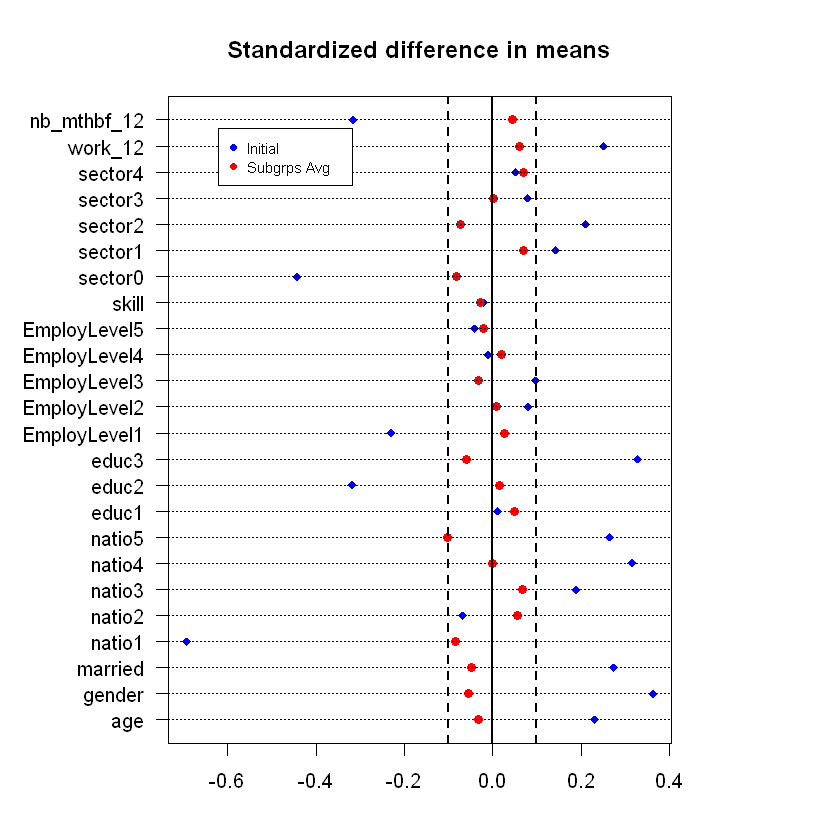

In [15]:
#### LOVE-PLOTS

# ALL
par(mar=c(4, 7, 4, 7), xpd=FALSE)
plot(StMeanDiff, 1:dim(X_trim)[2],  xlab=NA, ylab=NA, yaxt="n",
     xlim=c(min(c(StMeanDiff, StMeanDiff_block_t_new)),
            max(c(StMeanDiff, StMeanDiff_block_t_new))),
     pch=18, col="blue",
     main="Standardized difference in means", sub="Binary covariates")
points(StMeanDiff_block_t_new, 1:dim(X_trim_new)[2], col="red", pch=19)
axis(2, labels=names(X_trim),at=1:dim(X_trim_new)[2], las=1)
abline(h=1:dim(X_trim_new)[2], lty="dotted")
abline(v=0, lwd=2)
abline(v=0.1, lwd=2, lty=2)
abline(v=-0.1, lwd=2, lty=2)
par(xpd=TRUE)
legend("topleft",
       inset = c(0.1,0.05),
       legend = c("Initial", "Subgrps Avg"),
       pch = c(19, 19),
       col = c("blue", "red"),
       cex = 0.75)
par(xpd=FALSE)

Finally, the new groups are actually more unblanced.

#### 10 - Now that the study design phase is complete, read in the outcome, Outcome.

In [16]:
data = read.table("TrainingLux.txt",header=TRUE)
y = data$Outcome
Z = data$TREAT
X_treat = within(data, rm('Outcome'))
X = within(X_treat, rm('TREAT'))

#### 11 - Naively pretending that this observational study was actually a completely randomized experiment, and ignoring covariates, calculate a Neyman estimate of the average treatment effect and a large sample 95% interval and enter both in a table.

In [17]:
naive_neyman = function(X, Z, y){
    
    # Naive Neyman
    nT = sum(Z)
    nC = nrow(X)-nT

    y1_obs = y[Z==1]
    y0_obs = y[Z==0]
    ATE = mean(y1_obs) - mean(y0_obs)
    ATE_var = var(y1_obs)/nT + var(y0_obs)/nC
    obsLB1 = ATE-1.96*sqrt(ATE_var)
    obsUB1 = ATE+1.96*sqrt(ATE_var)
    out_df = data.frame(ATE_mean=ATE, ATE_lower_bound=obsLB1, ATE_upper_bound=obsUB1, ATE_std=sqrt(ATE_var))
    return (list(out_df=out_df,ATE=ATE,ATE_var=ATE_var))
    }
d = naive_neyman(X, Z, y)$out_df
round(d,4)

ATE_mean,ATE_lower_bound,ATE_upper_bound,ATE_std
<dbl>,<dbl>,<dbl>,<dbl>
-0.0273,-0.0575,0.0029,0.0154


#### 12 - Calculate the naive Neyman estimate as in 11, but on the subset of units obtained in 5. Report it in the table and comment briefly.

In [18]:
d_trim = naive_neyman(X_trim, Z_trim, y_trim)$out_df
neyman_tab=rbind(d,d_trim)
rownames(neyman_tab) = c('Naive','Trimmed')
round(neyman_tab,4)

,ATE_mean,ATE_lower_bound,ATE_upper_bound,ATE_std
,<dbl>,<dbl>,<dbl>,<dbl>
Naive,-0.0273,-0.0575,0.0029,0.0154
Trimmed,-0.0261,-0.0563,0.0041,0.0154


A negative ATE is very counter intuitive; it could be but at least is very unexpected. Anyway, the trimming operation increased (towards zero) the effect of the treatment and this is a symptom that probably a better design phase will give different results.

#### 13 - Obtain a Neyman point estimate for the treatment effect within each subclass from 6. Estimate the overall treatment effect by averaging across the subclasses, weighting according to the NUMBER OF UNITS IN THE ACTIVE TREATMENT GROUP in each subclass. Provide a 95% large sample confidence interval for the overall estimate by using the fact that: <img src="figures/formula.png"> Report the results in the summary table and compare this interval to the other intervals you've obtained, commenting briefly.
<u><b>NOTE:</b></u>: as demonstrated in section "Verification of N13", I am calculating an ATT because I am weighting on the number of treated units.

In [19]:
w_att = c()
w_ate = c()
ate = c()
ate_var = c()
for (bin in 1:max(bins)){
    sel_bool = bins==bin
    w_ate = c(w_ate,sum(sel_bool))
    w_att = c(w_att,sum(sel_bool & Z_trim==1))
    nn = naive_neyman(X_trim[sel_bool,], Z_trim[sel_bool], y_trim[sel_bool])
    ate = c(ate,nn$ATE)
    ate_var = c(ate_var,nn$ATE_var)
}
w_att = w_att/sum(w_att)
w_ate = w_ate/sum(w_ate)
d_groups_att = data.frame(ATE_mean=ate%*%w_att, 
                      ATE_lower_bound=ate%*%w_att-1.96*sqrt(ate_var%*%w_att^2), 
                      ATE_upper_bound=ate%*%w_att+1.96*sqrt(ate_var%*%w_att^2),
                      ATE_std = sqrt(ate_var%*%w_att^2))
d_groups_ate = data.frame(ATE_mean=ate%*%w_ate, 
                      ATE_lower_bound=ate%*%w_ate-1.96*sqrt(ate_var%*%w_ate^2), 
                      ATE_upper_bound=ate%*%w_ate+1.96*sqrt(ate_var%*%w_ate^2),
                      ATE_std = sqrt(ate_var%*%w_ate^2))
neyman_tab=rbind(d,d_trim,d_groups_ate,d_groups_att)
rownames(neyman_tab) = c('Naive (ATE)','Trimmed (ATE)','Stratification_13 (ATE)','Stratification_13 (ATT)')
round(neyman_tab,4)

,ATE_mean,ATE_lower_bound,ATE_upper_bound,ATE_std
,<dbl>,<dbl>,<dbl>,<dbl>
Naive (ATE),-0.0273,-0.0575,0.0029,0.0154
Trimmed (ATE),-0.0261,-0.0563,0.0041,0.0154
Stratification_13 (ATE),-0.0130,-0.0634,0.0374,0.0257
Stratification_13 (ATT),0.0229,-0.0087,0.0545,0.0161


The stratification performed at step 6 totally changed the ATE: now the effect of the treatment is positive and also the variance decreased a lot.

#### 14 - Obtain a Neyman point estimate and 95% large sample confidence interval based on the design you created in 9.

In [20]:
w_att = c()
w_ate = c()
ate = c()
ate_var = c()
bins_filt = bins_new[!is.na(bins_new)]
for (bin in 1:max(bins_filt)){
    sel_bool = bins_filt==bin
    w_ate = c(w_ate,sum(sel_bool))
    w_att = c(w_att,sum(sel_bool & Z_trim_new==1))
    nn = naive_neyman(X_trim_new[sel_bool,], Z_trim_new[sel_bool], y_trim_new[sel_bool])
    ate = c(ate,nn$ATE)
    ate_var = c(ate_var,nn$ATE_var)
}
w_ate = w_ate/sum(w_ate)
w_att = w_att/sum(w_att)
d_groups_att_new = data.frame(ATE_mean=ate%*%w_att, 
                      ATE_lower_bound=ate%*%w_att-1.96*sqrt(ate_var%*%w_att^2), 
                      ATE_upper_bound=ate%*%w_att+1.96*sqrt(ate_var%*%w_att^2),
                      ATE_std = sqrt(ate_var%*%w_att^2))
d_groups_ate_new = data.frame(ATE_mean=ate%*%w_ate, 
                      ATE_lower_bound=ate%*%w_ate-1.96*sqrt(ate_var%*%w_ate^2), 
                      ATE_upper_bound=ate%*%w_ate+1.96*sqrt(ate_var%*%w_ate^2),
                      ATE_std = sqrt(ate_var%*%w_ate^2))
neyman_tab=rbind(neyman_tab, d_groups_ate_new, d_groups_att_new)
rownames(neyman_tab)[5:6] = c('Stratification_14 (ATE)','Stratification_14 (ATT)')
round(neyman_tab,4)

,ATE_mean,ATE_lower_bound,ATE_upper_bound,ATE_std
,<dbl>,<dbl>,<dbl>,<dbl>
Naive (ATE),-0.0273,-0.0575,0.0029,0.0154
Trimmed (ATE),-0.0261,-0.0563,0.0041,0.0154
Stratification_13 (ATE),-0.0130,-0.0634,0.0374,0.0257
Stratification_13 (ATT),0.0229,-0.0087,0.0545,0.0161
Stratification_14 (ATE),0.0703,0.0230,0.1176,0.0241
Stratification_14 (ATT),0.0492,0.0052,0.0932,0.0225


#### 15 - Discuss the various estimates you obtained.
The stratification of step 9 changed even more the results. Since ATE (actually ATT because averaged on treatment units) from step 6 is more reliable (the balance is better) and an higher number of units are used, probably that is the most correct value.

#### 16 - Do you think that the covariates that are available in this data set are sufficient to support the unconfoundedness assumption? What other covariates might we want to include, if we had them?
The unconfoundedness cannot be tested by definition so it is difficult to say if the covariates are sufficient to support this assumption. To verify it, a sensitivity analysis should be performed; for example a the "placebo analysis" could be performed (identify a variable that cannot be affected by the treatment, estimate the ATE of Z on this variable and if it is statistically different from zero than the unconfoundedness assumption does not hold. <br> <br>
One consideration can be made on the "employability level": "employability level" is calculated by ADEM can be replaced directly by the covariates used to calculate it; this will esnure that "no filter" from ADEM calculation is added to the model.

#### 17 - You will use now the package MatchIt or other packages suggested during lectures to carry out a matching analysis. Start by performing an exact matching on all covariates. How many units are matched? Why is it the case?

In [21]:
data = read.table("TrainingLux.txt",header=TRUE)
y = data$Outcome
Z = data$TREAT
X_treat = within(data, rm('Outcome'))
X = within(X_treat, rm('TREAT'))
formula =TREAT ~ age + gender + married + natio1 + natio2 + natio3 + natio4 + natio5 + educ1 + educ2 + educ3 + EmployLevel1 + EmployLevel2 + EmployLevel3 + EmployLevel4 + EmployLevel5 + skill + sector0 + sector1 + sector2 + sector3 + sector4 + work_12 + nb_mthbf_12

#Exact Matching without replacement
m_exact_without_rep = matchit(formula, data = data, method = "exact")
summary(m_exact_without_rep)[2]$nn
# ftable(obs$TREAT, obs$RA, obs$RH, obs$MARR)

,Control,Treated
All (ESS),32617.0000,1085
All,32617.0000,1085
Matched (ESS),256.3492,164
Matched,487.0000,164
Unmatched,32130.0000,921
Discarded,0.0000,0


The matched units are 487 for controls and 164 for the treated. Since we performed an <b>"EXACT"</b> match, the number of matched of treated is very low (around 15% of the 1085 units).

#### 18 - Now, for each unit you will attempt to find the closest control unit in terms of propensity score. You will use a nearest-neighbor algorithm without replacement. Choose the best order for this greedy algorithm and explain the reason. Report balance measures before and after matching for all covariates. A graphical balance diagnostic is also welcome. How does balance look overall? Are there any variables in particular that look unbalanced even after matching?

In [22]:
m_nn_L = matchit(formula, data = data, method = "nearest", discard='control', reestimate=FALSE, m.order='largest')
m_nn_S = matchit(formula, data = data, method = "nearest", discard='control', reestimate=FALSE, m.order='smallest')
m_nn_R = matchit(formula, data = data, method = "nearest", discard='control', reestimate=FALSE, m.order='random')
mean(m_nn_L$distance[Z==1] - m_nn_L$distance[m_nn_L$match.matrix])
mean(m_nn_S$distance[Z==1] - m_nn_S$distance[m_nn_L$match.matrix])
mean(m_nn_R$distance[Z==1] - m_nn_R$distance[m_nn_R$match.matrix])
max(m_nn_L$distance[Z==1] - m_nn_L$distance[m_nn_L$match.matrix])
max(m_nn_S$distance[Z==1] - m_nn_S$distance[m_nn_L$match.matrix])
max(m_nn_R$distance[Z==1] - m_nn_R$distance[m_nn_R$match.matrix])

[1] 0.0001635032

[1] 0.0001635032

[1] 8.615459e-05

[1] 0.02397481

[1] 0.02397481

[1] 0.04462439

The most promising order is the "LARGEST" since it starts from the highest propensity score and this could be beneficial since the greedy algorithm will use the "best" matches for the units with the highest propensity score. Moreover, by examining the <b>average and maximum difference between propensity score of the matched units</b> it is clear that between LARGEST and SMALLEST there is no difference; the random function has a smaller value for the average but it has an high variance so it won't be used.

In [23]:
round(summary(m_nn_L)[4]$sum.matched,4)

,Means Treated,Means Control,Std. Mean Diff.,Var. Ratio,eCDF Mean,eCDF Max,Std. Pair Dist.
distance,0.1182,0.1180,0.0015,1.0098,0.0000,0.0046,0.0019
age,36.8258,36.9779,-0.0168,0.7364,0.0252,0.0562,1.0873
gender,0.6488,0.6350,0.0290,NA,0.0138,0.0138,0.7974
married,0.5558,0.5567,-0.0019,NA,0.0009,0.0009,0.8774
natio1,0.0553,0.0396,0.0686,NA,0.0157,0.0157,0.2863
natio2,0.2700,0.2959,-0.0581,NA,0.0258,0.0258,0.7307
natio3,0.2737,0.2756,-0.0041,NA,0.0018,0.0018,0.7276
natio4,0.1871,0.1926,-0.0142,NA,0.0055,0.0055,0.6145
natio5,0.2138,0.1963,0.0427,NA,0.0175,0.0175,0.7036
educ1,0.2774,0.2728,0.0103,NA,0.0046,0.0046,0.7925


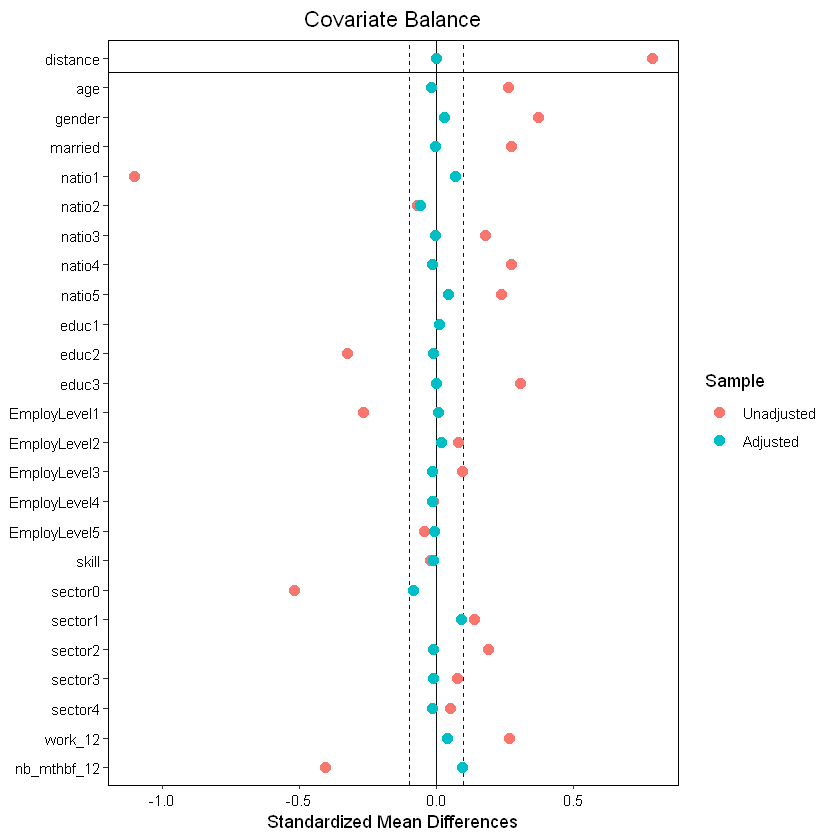

In [24]:
set.cobalt.options(binary = "std")
love.plot(m_nn_L,thresholds = c(m = .1))

The matching looks good overall and all covariates had a good impact from the matching.

#### 19. Repeat the analysis in 18, but using a different distance measure (e.g., Mahalanobis distance). How does balance look overall? Does this look better than in 18?

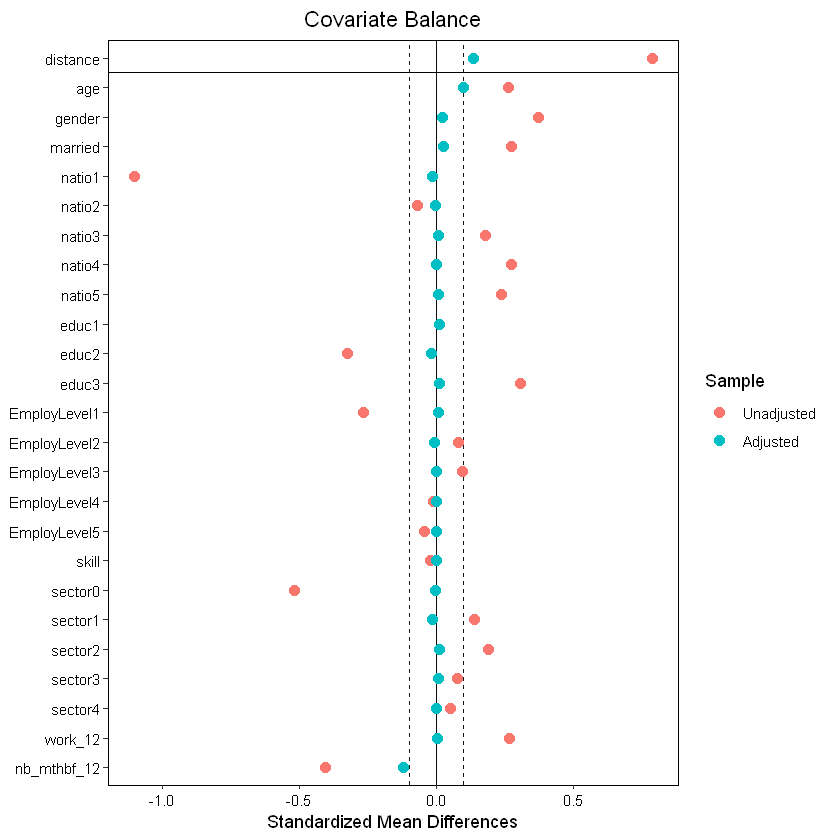

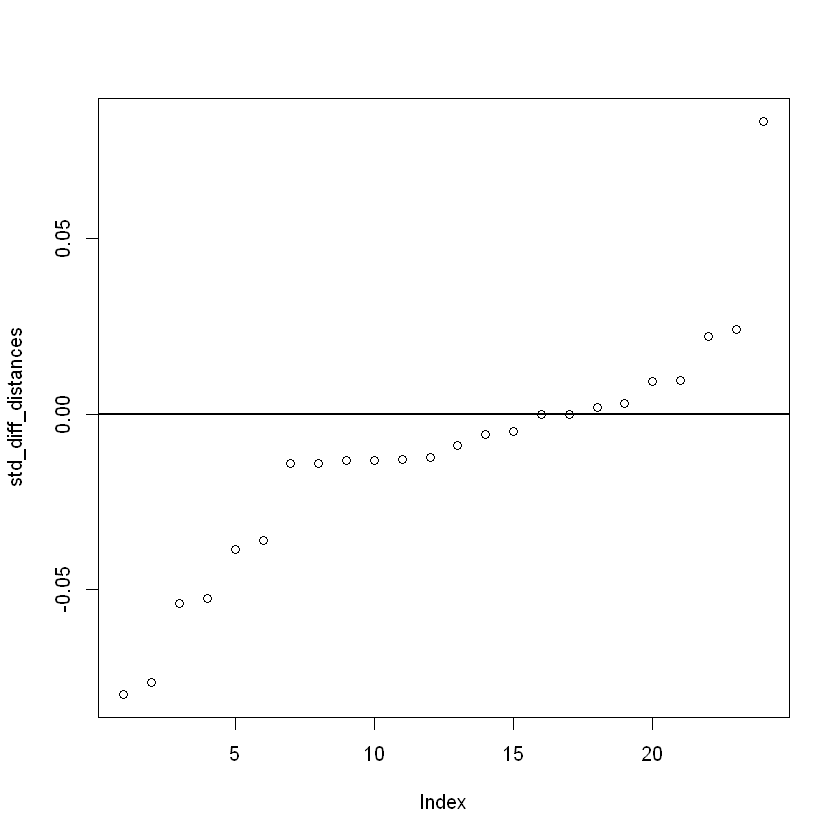

In [25]:
# m_nn_MAHA = matchit(formula, data = data, method = "nearest", m.order='random', distance='mahalanobis')
m_nn_MAHA = matchit(formula, data = data, method = "nearest", m.order='random', 
                    distance='glm', 
                    mahvars = ~ age + gender + married + 
                    natio1 + natio2 + natio3 + natio4 + natio5 + 
                    educ1 + educ2 + educ3 + 
                    EmployLevel1 + EmployLevel2 + EmployLevel3 + EmployLevel4 + EmployLevel5 + 
                    skill + 
                    sector0 +     sector1 + sector2 + sector3 + sector4 + 
                    work_12 + nb_mthbf_12)
set.cobalt.options(binary = "std")
love.plot(m_nn_MAHA,thresholds = c(m = .1))
std_diff_distances = sort((abs(summary(m_nn_MAHA)[4]$sum.matched[2:25,3]) - abs(summary(m_nn_L)[4]$sum.matched[2:25,3])))
plot(std_diff_distances)
abline(h=0, lwd=2)

In [26]:
mean(std_diff_distances)

[1] -0.0117811

The two distances are similar but if we compare the standardized difference we can see that Mahalanobis distance has a better balancing property on almost all the covariates (especially on sector1) but it performs worse on other covariates (examples: age and nb_mthbf_12). <br>
It is difficult to say which one is better in this case (also by loooking at the mean of the difference).

#### 20. Repeat the analysis in 18 or 19, whichever you prefer, but this time force the algorithm to look for controls with exactly the same values of two covariates of your choice (use nearest-neighbor with the option exact followed by the vector of covariates). Explain why you are choosing these two covariates and the reason for this kind of matching. Be specific and report results.

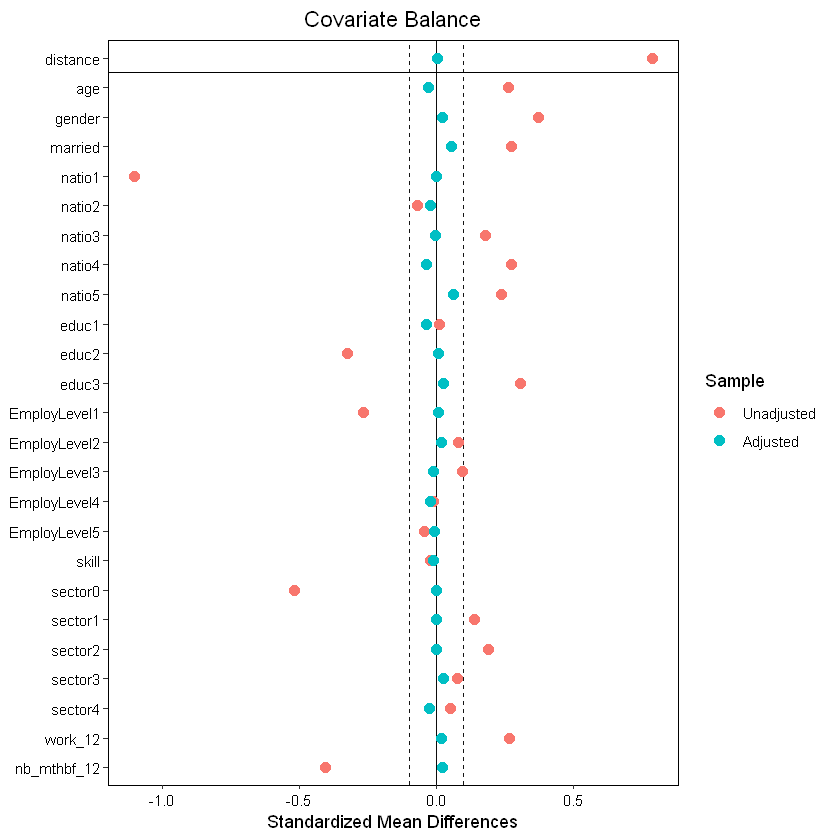

In [27]:
m_nn_2v = matchit(formula, data = data, method = "nearest", exact=c('sector0','sector1'),
                 discard='control', reestimate=FALSE, m.order='largest')
love.plot(m_nn_2v,thresholds = c(m = .1))

I decided to use the "sector0" and "sector1" because they where the two categorical variables with the highest unbalance. <br> I discarded the option of using continuous variables because the exact match on these kind of variables is not very informative (example: two unit that are equal on all covariates but with a difference on 1 day in the age, won't be considered because of the exact match condition). I verified with the love plot that using the exact match on the two continuos variables will results in a worse balance.

#### 21 - Repeat the analysis in 18 or 19 with replacement. Report balance measures before and after matching for all covariates and the propensity score. How does this method compare to the one in 18 or 19? Please explain the bias-variance trade-off.

In [28]:
m_nn_L_rep = matchit(formula, data = data, method = "nearest", discard='control', reestimate=FALSE, 
                          m.order='largest',replace=T)

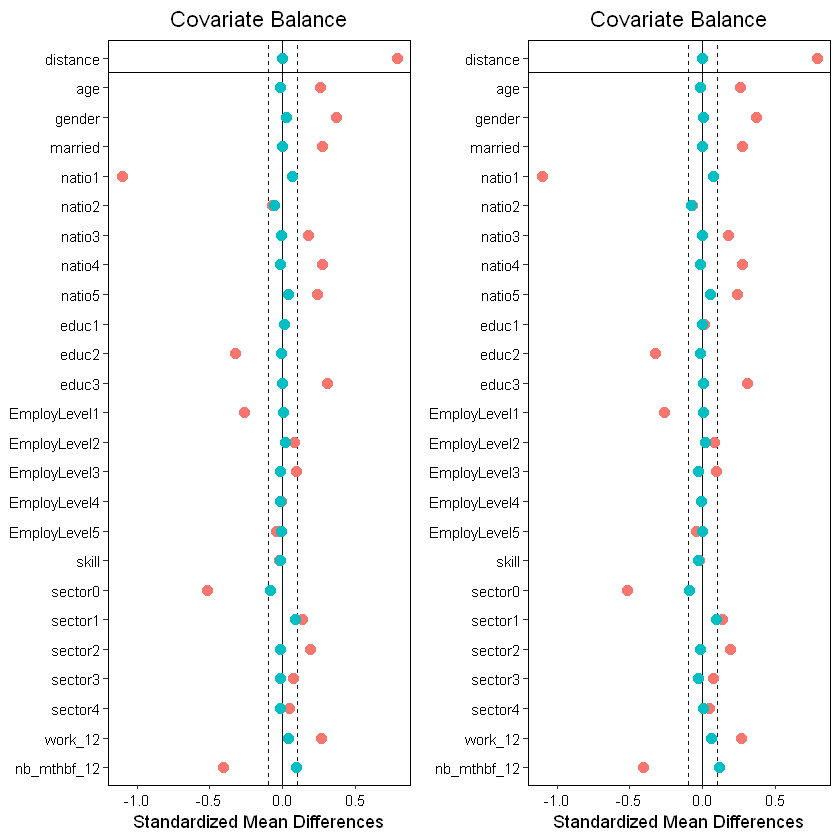

In [29]:
options(jupyter.plot_scale=1)

a = love.plot(m_nn_L,thresholds = c(m = .1))
a = a + theme(legend.position = "none")

b = love.plot(m_nn_L_rep,thresholds = c(m = .1))
b = b + theme(legend.position = "none")

grid.newpage()
pushViewport(viewport(layout = grid.layout(1, 2)))
vplayout <- function(x, y) viewport(layout.pos.row = x, layout.pos.col = y)
print(a, vp = vplayout(1, 1))  # key is to define vplayout
print(b, vp = vplayout(1, 2))

In [30]:
round(data.frame(balance_without_rep = mean(m_nn_L$distance[Z==1] - m_nn_L$distance[m_nn_L$match.matrix]),
                 balance_with_rep = mean(m_nn_L_rep$distance[Z==1] - m_nn_L_rep$distance[m_nn_L_rep$match.matrix]),
                 ratio =mean(m_nn_L$distance[Z==1] - m_nn_L$distance[m_nn_L$match.matrix])/mean(m_nn_L_rep$distance[Z==1] - m_nn_L_rep$distance[m_nn_L_rep$match.matrix])),
      6)

balance_without_rep,balance_with_rep,ratio
<dbl>,<dbl>,<dbl>
0.000164,3.1e-05,5.320886


The replacement of the data gives an higher average balance of the dataset but this is expected. <br>
The risk of having the replacement is that a single control unit can be the closest match for a lot of treated unit; this result in a very good average balance (low bias) but we are using just few control units so the model is very specific (high bias).

#### 22 - Obtain a Neyman point estimate of the ATT and 95% large sample confidence interval based on the matched data derived in 18 or 19 and in 21. Compare the results.

In [43]:
ATT_calc = function(matchit_obj, already_matched=FALSE){
    if (already_matched==FALSE){
        out_data = match.data(matchit_obj)
    }
    else{
        out_data = matchit_obj
    }
    m_T = weighted.mean(out_data$Outcome[out_data$TREAT==1], out_data$weights[out_data$TREAT==1])
    m_C = weighted.mean(out_data$Outcome[out_data$TREAT==0], out_data$weights[out_data$TREAT==0])
    ATT = m_T-m_C
    ATT_std= sqrt(var(out_data$Outcome[out_data$TREAT==1])/sum(out_data$TREAT==1)+
                           var(out_data$Outcome[out_data$TREAT==0])/sum(out_data$TREAT==0))

    return (list(ATT_mean=ATT,ATT_lower_bound=ATT-1.96*ATT_std, ATT_upper_bound=ATT+1.96*ATT_std, ATT_std=ATT_std))
}


ATT_m_nn_L     = ATT_calc(m_nn_L)
ATT_m_nn_MAHA  = ATT_calc(m_nn_MAHA)
ATT_m_nn_L_rep = ATT_calc(m_nn_L_rep)

ATT_res = rbind(data.frame(ATT_m_nn_L), data.frame(ATT_m_nn_MAHA), data.frame(ATT_m_nn_L_rep))  
rownames(ATT_res) = c('Largest PS','Largest Mahalanobis', 'Largest PS with rep')
ATT_res

,ATT_mean,ATT_lower_bound,ATT_upper_bound,ATT_std
,<dbl>,<dbl>,<dbl>,<dbl>
Largest PS,0.033179724,-0.008701494,0.07506094,0.02136797
Largest Mahalanobis,0.004608295,-0.037393076,0.04660967,0.02142927
Largest PS with rep,0.035023041,-0.007996523,0.07804261,0.02194876


#### 23 - Compare results based on matching with those obtained in 13 and 14.

In [32]:
res_13_14 = neyman_tab[c('Stratification_13 (ATE)','Stratification_14 (ATE)', 'Stratification_13 (ATT)','Stratification_14 (ATT)'),]
colnames(res_13_14) = c('ATT_mean','ATT_lower_bound','ATT_upper_bound','ATT_std')
res_23 = rbind(res_13_14,ATT_res)
res_23

,ATT_mean,ATT_lower_bound,ATT_upper_bound,ATT_std
,<dbl>,<dbl>,<dbl>,<dbl>
Stratification_13 (ATE),-0.012988729,-0.063393447,0.03741599,0.02571669
Stratification_14 (ATE),0.070288750,0.023000797,0.11757670,0.02412651
Stratification_13 (ATT),0.022892494,-0.008696394,0.05448138,0.01611678
Stratification_14 (ATT),0.049178771,0.005163809,0.09319373,0.02245661
Largest PS,0.033179724,-0.008701494,0.07506094,0.02136797
Largest Mahalanobis,0.004608295,-0.037393076,0.04660967,0.02142927
Largest PS with rep,0.035023041,-0.007996523,0.07804261,0.02194876


The Mahalanobis distance is the outlier in this table. After studying the formulation of the Mahalanobis distance I discovered that probably it is not suitable for categorical variables (that are the majority here). Here below I reported the difference in means of the covariates of the two matching (propensity score and Mahalanobis); there are some differences but not very high difference (as already shown in step 19).

In [33]:
a = summary(m_nn_L)[4]$sum.matched[,1]-summary(m_nn_L)[4]$sum.matched[,2] 
b = summary(m_nn_MAHA)[4]$sum.matched[,1]-summary(m_nn_MAHA)[4]$sum.matched[,2]
data.frame('Largest'=a,'Mahalanobis'=b)

,Largest,Mahalanobis
,<dbl>,<dbl>
distance,0.0001635032,0.015243412
age,-0.1520737327,0.908755760
gender,0.0138248848,0.011059908
married,-0.0009216590,0.011981567
natio1,0.0156682028,-0.003686636
natio2,-0.0258064516,-0.001843318
natio3,-0.0018433180,0.002764977
natio4,-0.0055299539,0.000000000
natio5,0.0175115207,0.002764977


#### YOUR OWN PREFERRED ANALYSIS

#### 24 - Use any other methods (IPTW, Subclassification, regression, BART, CART etc...) for estimating ATE, ATT or other causal effects we believe are relevant for the study. You may also investigate treatment effect heterogeneity and estimate CATEs.

##### Subclassification

In [88]:
m_sub = matchit(formula, data = data, method = "subclass", estimand = "ATT", discard='control')
res_24_a = rbind(res_23,ATT_calc(m_sub))
rownames(res_24_a)[dim(res_24_a)[1]]='Subclassification'

##### Optimal Match

In [89]:
m_opt = matchit(formula, data = data, method = "optimal", discard='control')
res_24_b = rbind(res_24_a,ATT_calc(m_opt))
rownames(res_24_b)[dim(res_24_b)[1]]='optimal'

##### Nearest Neighbour with common support on both T & C and with re-estimation of PS

In [90]:
m_larg_both = matchit(formula, data = data,
                      method = "nearest",
                      discard='both',
                      reestimate=TRUE,
                      m.order='largest')
res_24_c = rbind(res_24_b,ATT_calc(m_larg_both))
rownames(res_24_c)[dim(res_24_c)[1]]='Largest T&C common support'
res_24_c

,ATT_mean,ATT_lower_bound,ATT_upper_bound,ATT_std
,<dbl>,<dbl>,<dbl>,<dbl>
Stratification_13 (ATE),-0.012988729,-0.063393447,0.03741599,0.02571669
Stratification_14 (ATE),0.070288750,0.023000797,0.11757670,0.02412651
Stratification_13 (ATT),0.022892494,-0.008696394,0.05448138,0.01611678
Stratification_14 (ATT),0.049178771,0.005163809,0.09319373,0.02245661
Largest PS,0.033179724,-0.008701494,0.07506094,0.02136797
Largest Mahalanobis,0.004608295,-0.037393076,0.04660967,0.02142927
Largest PS with rep,0.035023041,-0.007996523,0.07804261,0.02194876
Subclassification,0.023184326,-0.007021306,0.05338996,0.01541104
optimal,0.023041475,-0.018890315,0.06497326,0.02139377


Investigation of treatment effect heterogeneity on the subclassification match.

In [86]:
data_sub = match.data(m_sub)
for(s in 1:max(as.numeric(data_sub$subclass))){
    ATT_s = ATT_calc(data_sub[data_sub$subclass==s,], already_matched=TRUE)
    if (s==1){
        CATE = data.frame(ATT_s)
        rownames(CATE) = c('sub_1')
    }
    else{
        CATE = rbind(CATE, data.frame(ATT_s))  
        rownames(CATE) = c(rownames(CATE)[1:dim(CATE)[1]-1],paste('sub', s, sep="_"))
    }
}
CATE['N'] = table(unlist(data_sub[data_sub$TREAT==1,'subclass']))
CATE

,ATT_mean,ATT_lower_bound,ATT_upper_bound,ATT_std,N
,<dbl>,<dbl>,<dbl>,<dbl>,<table>
sub_1,-0.04832790,-0.121570754,0.02491495,0.03736880,181
sub_2,0.08359726,0.009193415,0.15800111,0.03796115,181
sub_3,0.06571443,-0.010270803,0.14169967,0.03876798,180
sub_4,0.01980215,-0.058147259,0.09775157,0.03977011,181
sub_5,0.04629560,-0.033463492,0.12605470,0.04069342,181
sub_6,-0.02774062,-0.110470834,0.05498959,0.04220929,181


#### 25. Please briefy present the method and explain your preference & 26. Compare estimates and discuss results in terms of point estimates and variances.
I tried multiple strategies for the matching in order to compare the final results.<br>
The subclassification is very similar to what I tried to achieve in step 13 (groups with similar amount of treated units) but it finds automatically the number of subclasses. <br>
The optimal match is similar to the nearest neighbor matching except that an overall distance criterion is minimized (no greedy algorithm used). <br>
Finally, I tried to performe an NN matching with common support on both treated and controls (units with complete overlap only are considered) and with re-estimation of PS after the trimming operation.<br><br>
I do not have a clear preference because there are two considerations that point in different directions:
- Mahalanobis distance is the one with lower difference in mean with respect to "largest" stratification; this means that the categories are more balanced, even though there is no comparable variance measure to deeply analyze this concept.
- All matching except the Mahalanobis are showing a positive ATT of around 2/3 %.
<br>
The 95% confidence interval for all the methods (except the Mahalanobis one) shows an "almost zero" effect as lower bound and a range of []% for the upper bound. These values for the CI tell us that the effect is positive but probably the effect can be different based on groups and this is why the CATE analysis performed at the previous step can be useful (even though in this case does not answer the question because the variances in each group are still pretty high).

In [91]:
res_24_c

,ATT_mean,ATT_lower_bound,ATT_upper_bound,ATT_std
,<dbl>,<dbl>,<dbl>,<dbl>
Stratification_13 (ATE),-0.012988729,-0.063393447,0.03741599,0.02571669
Stratification_14 (ATE),0.070288750,0.023000797,0.11757670,0.02412651
Stratification_13 (ATT),0.022892494,-0.008696394,0.05448138,0.01611678
Stratification_14 (ATT),0.049178771,0.005163809,0.09319373,0.02245661
Largest PS,0.033179724,-0.008701494,0.07506094,0.02136797
Largest Mahalanobis,0.004608295,-0.037393076,0.04660967,0.02142927
Largest PS with rep,0.035023041,-0.007996523,0.07804261,0.02194876
Subclassification,0.023184326,-0.007021306,0.05338996,0.01541104
optimal,0.023041475,-0.018890315,0.06497326,0.02139377


# 2 - Verification

#### Verification N13

In [59]:
formula =TREAT ~ age + gender + married + natio1 + natio2 + natio3 + natio4 + natio5 + educ1 + educ2 + educ3 + EmployLevel1 + EmployLevel2 + EmployLevel3 + EmployLevel4 + EmployLevel5 + skill + sector0 + sector1 + sector2 + sector3 + sector4 + work_12 + nb_mthbf_12
m.sub2 <- matchit(formula, 
                  data = data[trim_bool,], method = "subclass", discard='control', 
                  subclass=c(0.72, 0.86, 0.925, 0.97),  estimand='ATE')
ATT_calc(m.sub2)
table(m.sub2$subclass, Z_trim)

# Get matched data, subclass indicator variable is “subclass”
data.sub <- match.data(m.sub2)


#ATE estimate (combining subclass-specific estimate)
# define N = total number of people 
N <- dim(data.sub)[1]
N
Nt <- sum(data.sub$TREAT==1)
#Neyman within each subclass


# Initialize vectors for subclass-specific effects 
sub.effect <- rep(NA, max(as.numeric(data.sub$subclass)))
sub.var <- rep(NA, max(as.numeric(data.sub$subclass)))
sub.N <- sub.Nt<-rep(NA, max(as.numeric(data.sub$subclass)))

for(s in 1:max(as.numeric(data.sub$subclass))){
  sub.effect[s] <- mean(data.sub$Outcome[data.sub$TREAT==1 & data.sub$subclass==s])-
    mean(data.sub$Outcome[data.sub$TREAT==0 & data.sub$subclass==s])
  sub.var[s] <-  
    var(data.sub$Outcome[data.sub$TREAT==1 & data.sub$subclass==s])/sum(data.sub$TREAT==1 & data.sub$subclass==s)+
    var(data.sub$Outcome[data.sub$TREAT==0 & data.sub$subclass==s])/sum(data.sub$TREAT==0 & data.sub$subclass==s)
  sub.N[s] <- sum(data.sub$subclass==s) 
  sub.Nt[s] <- sum(data.sub$TREAT==1 & data.sub$subclass==s) 
}
# Calculate overall ATE and ATT effects
ATE.effect <- sum((sub.N/N)*sub.effect)
ATE.effect 
ATE.stderror <- sqrt(sum((sub.N/N)^2*sub.var))
ATE.stderror 

# Calculate overall ATE and ATT effects
ATT.effect <- sum((sub.Nt/Nt)*sub.effect)
ATT.effect 
ATT.stderror <- sqrt(sum((sub.Nt/Nt)^2*sub.var))
ATT.stderror 


$ATT_mean
[1] -0.01299845

$ATT_lower_bound
[1] -0.0432041

$ATT_upper_bound
[1] 0.0172072

$ATT_std
[1] 0.01541104

   Z_trim
        0     1
  1 23789   209
  2  4450   208
  3  1954   221
  4  1292   208
  5   761   239

[1] 33331

[1] -0.01299845

[1] 0.02571522

[1] 0.02307992

[1] 0.01611592

# 3 - Backup

In [92]:
# sub.effect
# ate

In [39]:
# table(m_sub$subclass, Z)


   Z
        0     1
  1 22735   181
  2  4607   181
  3  2182   180
  4  1265   181
  5   888   181
  6   570   181

In [40]:
# sum(data.sub$subclass==2) 
# dim(X_trim[bins==2,]) 

[1] 4658

[1] 4669   24

In [41]:
# mean(data.sub$Outcome[data.sub$TREAT==1 & data.sub$subclass==2])-
#     mean(data.sub$Outcome[data.sub$TREAT==0 & data.sub$subclass==2])

[1] 0.1078587

In [42]:
# table(data.sub$subclass,Z_trim)

ERROR: Error in table(data.sub$subclass, Z_trim): all arguments must have the same length


In [ ]:
# out_data = match.data(m_nn_MAHA)
# sum(out_data$TREAT==0)==sum(out_data$TREAT==1)
# mean(out_data$Outcome[out_data$TREAT==1] - out_data$Outcome[out_data$TREAT==0])
# out_data

In [ ]:
# m_nn_MAHA$distance[Z==1] - m_nn_MAHA$distance[m_nn_MAHA$match.matrix]

In [ ]:
# m_nn_MAHA

In [ ]:
# m = matchit(formula, data = data, method = "nearest", discard='control', reestimate=FALSE, m.order='largest')

In [ ]:
# formula

In [ ]:
# m = matchit(formula, data = data, method = "nearest", m.order='random', distance='glm', mahvars = ~ age + gender + married + natio1 + natio2 + natio3 + natio4 + 
#     natio5 + educ1 + educ2 + educ3 + EmployLevel1 + EmployLevel2 + 
#     EmployLevel3 + EmployLevel4 + EmployLevel5 + skill + sector0 + 
#     sector1 + sector2 + sector3 + sector4 + work_12 + nb_mthbf_12)


In [ ]:
# out_data = match.data(m)
# sum(out_data$TREAT==0)==sum(out_data$TREAT==1)
# mean(out_data$Outcome[out_data$TREAT==1] - out_data$Outcome[out_data$TREAT==0])

In [ ]:
# mean(m$distance[Z==1] - m$distance[m_nn_MAHA$match.matrix])

In [ ]:
# mean(m$distance[Z==1] - m$distance[m_nn_MAHA$match.matrix])

In [ ]:
# sum(match.data(m)[,'natio4'][match.data(m)[,'TREAT']==1])

In [ ]:
# out_data = match.data(m.sub2)
# m_T = weighted.mean(out_data$Outcome[out_data$TREAT==1], out_data$weights[out_data$TREAT==1])
# m_C = weighted.mean(out_data$Outcome[out_data$TREAT==0], out_data$weights[out_data$TREAT==0])
# ATT = m_T-m_C
# ATT

In [ ]:
# dim(X_trim*)

In [ ]:
# Stratification_13 (ATE)

In [ ]:
# m.mydataR <- match.data(m_nn_L_rep)

# mean(weighted.mean(m.mydataR$Outcome[m.mydataR$TREAT==1],
#               m.mydataR$weights[m.mydataR$TREAT==1])-
# weighted.mean(m.mydataR$Outcome[m.mydataR$TREAT==0],
#                 m.mydataR$weights[m.mydataR$TREAT==0]))

# modR<-lm(Outcome~TREAT, data=m.mydataR, weights=m.mydataR$weights)
# summary(modR)

# modR<-lm(Outcome~TREAT, data=match.data(m_nn_L), weights=match.data(m_nn_L)$weights)
# summary(modR)

In [72]:
# m.sub2 = m_sub
# ATT_calc(m.sub2)
# table(m.sub2$subclass, Z)

# # Get matched data, subclass indicator variable is “subclass”
# data.sub <- match.data(m.sub2)


# #ATE estimate (combining subclass-specific estimate)
# # define N = total number of people 
# N <- dim(data.sub)[1]
# N
# Nt <- sum(data.sub$TREAT==1)
# #Neyman within each subclass


# # Initialize vectors for subclass-specific effects 
# sub.effect <- rep(NA, max(as.numeric(data.sub$subclass)))
# sub.var <- rep(NA, max(as.numeric(data.sub$subclass)))
# sub.N <- sub.Nt<-rep(NA, max(as.numeric(data.sub$subclass)))

# for(s in 1:max(as.numeric(data.sub$subclass))){
#   sub.effect[s] <- mean(data.sub$Outcome[data.sub$TREAT==1 & data.sub$subclass==s])-
#     mean(data.sub$Outcome[data.sub$TREAT==0 & data.sub$subclass==s])
#   sub.var[s] <-  
#     var(data.sub$Outcome[data.sub$TREAT==1 & data.sub$subclass==s])/sum(data.sub$TREAT==1 & data.sub$subclass==s)+
#     var(data.sub$Outcome[data.sub$TREAT==0 & data.sub$subclass==s])/sum(data.sub$TREAT==0 & data.sub$subclass==s)
#   sub.N[s] <- sum(data.sub$subclass==s) 
#   sub.Nt[s] <- sum(data.sub$TREAT==1 & data.sub$subclass==s) 
# }
# # Calculate overall ATE and ATT effects
# ATE.effect <- sum((sub.N/N)*sub.effect)
# ATE.effect 
# ATE.stderror <- sqrt(sum((sub.N/N)^2*sub.var))
# ATE.stderror 

# # Calculate overall ATE and ATT effects
# ATT.effect <- sum((sub.Nt/Nt)*sub.effect)
# ATT.effect 
# ATT.stderror <- sqrt(sum((sub.Nt/Nt)^2*sub.var))
# ATT.stderror 


$ATT_mean
[1] 0.02318433

$ATT_lower_bound
[1] -0.007021306

$ATT_upper_bound
[1] 0.05338996

$ATT_std
[1] 0.01541104

   Z
        0     1
  1 22735   181
  2  4607   181
  3  2182   180
  4  1265   181
  5   888   181
  6   570   181

[1] 33332

[1] -0.0148419

[1] 0.02651246

[1] 0.02318433

[1] 0.01612481

In [77]:
# sub.Nt

[1] 181 181 180 181 181 181

In [84]:
# CATE$N/sum(CATE$N)

[1] 623 194 104  65  42  40

In [85]:
# sum(data_sub$TREAT==1 & data_sub$subclass==1)

[1] 181

In [ ]:
# sum(data.sub$subclass==s) 